# Data Challenge
July 2024

Hello from Cinépolis! :)

Read all the assignment before you start coding.

You will be given 5 datasets:

1. Emails.csv, a csv with rows that represent an email sent to each customer
2. Transactions.csv, a csv with transactional data for a select number of theaters
3. Pricebook.csv, a csv with the full price for an adult ticket of a select number of theaters (these should be the same as those found in the transactions file)
4. Releases.csv, a csv with the release date of movies in 2024 and the total number of tickets sold for each movie
5. Customers.csv, a csv with the ids of customers so you can join communications and transactions

Instructions:
- Try to do as many tasks as you can within the provided timeframe.
- Do not return any data, we're only interested in the code.
- Your deliverable must be a jupyter notebook saved as HTML (or something similar), with the outputs you want us to look at, and without any unnecessary code.

Some tips:
- Do not assume we will infer anything from your code. Explain what you're doing, why you're doing it, what you interpret from your results, and what questions you have of your own.
- State any assumptions or comments explicitly in the code.
- Code doesn't have to be perfect, but keep it readable. If it's not readable, we'll be sad. If we're sad, we probably won't want to interview you.
- We recommend that you work no more than 5 hours on this assignment.
- If you need more time, ask.
- If you have any questions, ask.

## Task 1
You just started your new job at Cinépolis (yay!), and you're eager to better understand the industry you're working for. You already have a bunch of data, and you would like to know the behavior of customer attendance to theaters.

Perform an EDA of the transactions. Here are some recommendations:
   - Try to find seasonal patterns and describe any you might find.
   - It might be useful to check the Releases.csv file, as it will tell you the release dates of movies, as well as how popular they were. You might be able to correlate attendance with some movies with which you might be familiar.
   - Do you see any unexpected spikes in attendance? Make a hypothesis of what could those be.
   - Is there any difference between theater brands? What can you say about prices and attendance by brand?
   - How many days do people wait before buying tickets for their movies?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#import releases and transactions files

rel = pd.read_csv('/Users/Stefano_1/Documents/Data/Cinepolis/Releases.csv', delimiter='|')
tra = pd.read_csv('/Users/Stefano_1/Documents/Data/Cinepolis/Transactions.csv')

In [ ]:
#check the structure of the tansactions data.
#if needed, the card membership id could be modified to shorten the values
tra.head()

,ID_CINE,FECHA_TRANSACCION,FECHA_FUNCION,CARD_MEMBERSHIPID,ID_MARCA,TX_PELICULA_UNICA,BOLETOS,IMPORTE_TAQUILLA
0,219,2024-06-13,2024-06-13,4f01380467cb31bd50a00d8eba4d7ac788caedf0c64477...,1,INTENSAMENTE 2,1,195.0
1,219,2024-06-13,2024-06-14,eba23e28e2ca059479721104ae827b5a18c85683b4131a...,1,INTENSAMENTE 2,2,200.0
2,219,2024-06-13,2024-06-13,7b4a2ea46a0f3324a47a4b549a2e87f755af7ccaa18898...,1,INTENSAMENTE 2,2,200.0
3,219,2024-06-13,2024-06-14,b4e1a90bec8442a953735d09d33599c0c8c9772611de12...,1,INTENSAMENTE 2,4,588.0
4,219,2024-06-13,2024-06-13,e56ef40fd62c2ec123072a5a793ae8afce2d094e9098e3...,1,LOS EXTRAÑOS: CAPÍTULO 1,2,200.0


In [ ]:
rel.sort_values('VENTAS', ascending=False).head(10)

,TX_PELICULA_UNICA,ESTRENO,VENTAS
236,INTENSAMENTE 2,2024-06-13,6156314
243,KUNG FU PANDA 4,2024-03-03,2423042
275,MI VILLANO FAVORITO 4,2024-07-04,2351192
217,GODZILLA Y KONG:EL NUEVO IMPERIO,2024-03-27,2249717
109,EL PLANETA DE LOS SIMIOS: NUEVO,2024-05-09,1578195
208,GARFIELD: FUERA DE CASA,2024-04-30,1488646
50,BAD BOYS HASTA LA MUERTE,2024-06-06,1277017
393,UN LUGAR EN SILENCIO: DÍA UNO,2024-06-21,1209590
94,DUNA PARTE DOS,2024-02-29,1004194
31,AMIGOS IMAGINARIOS,2024-05-15,879858


Se empieza con una gráfica de línea para cada día en la base y su respectivo ingreso acumulado. También se marcan los domingos donde se puede identificar que por lo general los fines de semana tienden a presentar mayores ingresos a excepción de contadas ocasiones como se observa a mediados de Junio, donde es probable que Intensamente 2 haya generado mayor tráfico los días previos.

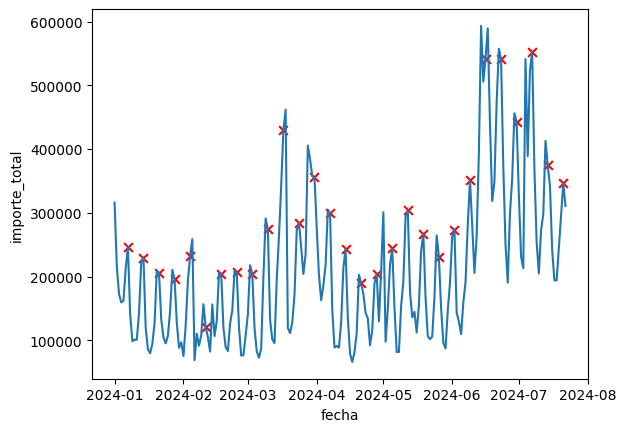

In [ ]:
#summarise the data to create a time series with daily revenue
daily_revenue = tra.groupby('FECHA_TRANSACCION')['IMPORTE_TAQUILLA'].sum().reset_index()
daily_revenue.columns = ['fecha', 'importe_total']
daily_revenue['fecha'] = pd.to_datetime(daily_revenue['fecha'])

sns.lineplot(data = daily_revenue, x = 'fecha', y = 'importe_total')

#highlight sundays
sundays = daily_revenue[daily_revenue['fecha'].dt.dayofweek == 6]
plt.scatter(sundays['fecha'], sundays['importe_total'], color='red', s=40, marker='x')

plt.show()

Para verificar la afirmación de la gráfica pasada, se incluyen las fechas de estreno del top 10 de películas por ingresos. Casi todas las películas están alineadas con un incremento inmediato en taquilla a los pocos días a excepción de Duna Parte Dos y Kung Fu Panda 4. Después de una revisión rápida en internet, se encuentra que Duna Parte Dos en realidad se estrenó el 15 de Marzo mientras que Kung Fu Panda 4 el 8 de Marzo. Al revisar estas fechas sí se observa un incremento en ingresos de taquilla.

Se observan pocos incrementos inesperados de ingresos, pero es posible identificar que Intensamente 2 genero un pico inusual en viernes -exactamente en la fecha de estreno- a diferencia de la mayoría de las demás películas. También durante finales de Marzo y principios de Abril se percibe un aumento inusual en taquilla entre semana, esto está relacionado a las vacaciones de Semana Santa y Pascua.

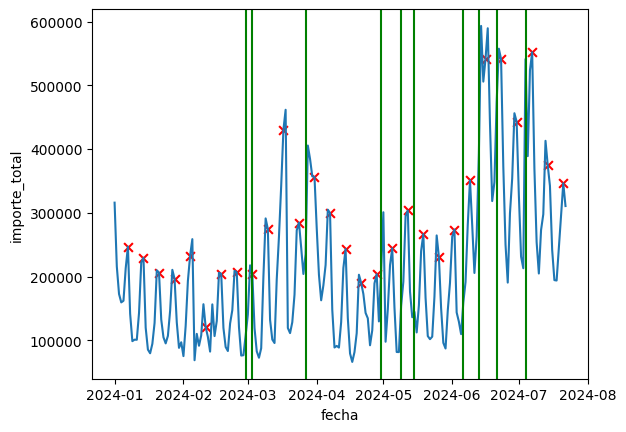

In [ ]:
#let's try to overlap the premiere date of the top 10 movies with the time series
top_10 = rel.sort_values('VENTAS', ascending=False).head(10)

sns.lineplot(data = daily_revenue, x = 'fecha', y = 'importe_total')

#highlight sundays
sundays = daily_revenue[daily_revenue['fecha'].dt.dayofweek == 6]
plt.scatter(sundays['fecha'], sundays['importe_total'], color='red', s=40, marker='x')

for date in top_10.ESTRENO:
    plt.axvline(pd.to_datetime(date), color = 'green')

plt.show()


En distintas marcas de cines, la diferencia en el desempeño de taquilla es importante. La marca 1, la cual es posible que sea Cinépolis tal cual, es la que más genera aunque existe la posibilidad de que también sea la que más locaciones y asientos tiene. Para poder determinar el desempeño real habría que calcular la ganancia por boleto. También se podría hacer este ejercicio para calcular la ganancia promedio por cine para cada marca para poder comparar su desempeño de manera más objetiva.

/var/folders/5j/7vfy0ndj133gm55cj1czw8rr0000gn/T/ipykernel_35605/256579363.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=30)
/var/folders/5j/7vfy0ndj133gm55cj1czw8rr0000gn/T/ipykernel_35605/256579363.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=30)
/var/folders/5j/7vfy0ndj133gm55cj1czw8rr0000gn/T/ipykernel_35605/256579363.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=30)


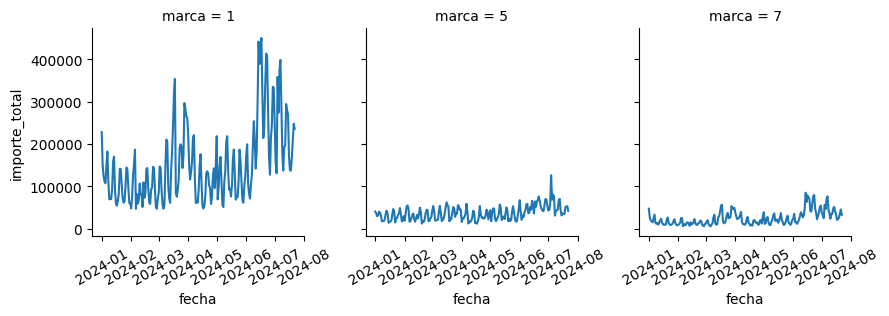

In [ ]:
#summarise the data to create a time series with daily revenue
daily_revenue = tra.groupby(['FECHA_TRANSACCION', 'ID_MARCA'])['IMPORTE_TAQUILLA'].sum().reset_index()
daily_revenue.columns = ['fecha', 'marca', 'importe_total']
daily_revenue['fecha'] = pd.to_datetime(daily_revenue['fecha'])

p = sns.FacetGrid(daily_revenue, col='marca')
p.map(sns.lineplot, 'fecha', 'importe_total')

for axes in p.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=30)
plt.show()

Mientras en la gráfica anterior se observa que las ganancias totales son mayores en la marca 1, en la siguiente gráfica es posible ver que los precios en la marca 5 son mayores (probablemente Cinépolis VIP), por lo que dividiendo por la asistencia se puede observar que la ganancia por boleto en promedio es cerca o más del doble en esta marca. La marca 7 parece tener una ganancia promedio menor que la marca 1. (¿Esta marca podría ser algún tipo de cines que casi no se anuncian que son más baratos?)

/var/folders/5j/7vfy0ndj133gm55cj1czw8rr0000gn/T/ipykernel_35605/2927341320.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=30)
/var/folders/5j/7vfy0ndj133gm55cj1czw8rr0000gn/T/ipykernel_35605/2927341320.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=30)
/var/folders/5j/7vfy0ndj133gm55cj1czw8rr0000gn/T/ipykernel_35605/2927341320.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=30)


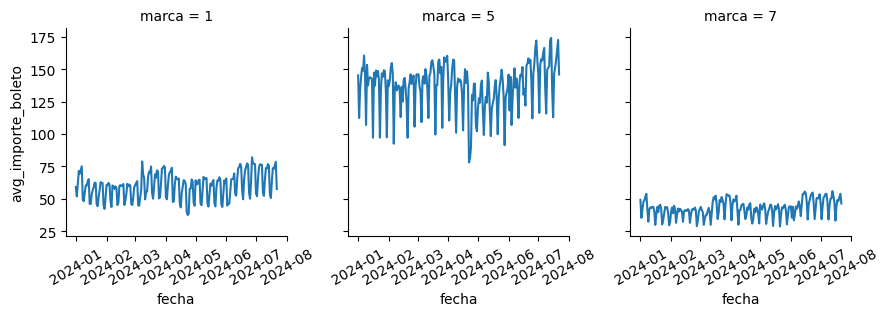

In [ ]:
#summarise the data to create a time series with daily revenue
daily_revenue = tra.groupby(['FECHA_TRANSACCION', 'ID_MARCA']).agg(
    Importe_total = pd.NamedAgg('IMPORTE_TAQUILLA', 'sum'),
    Boletos = pd.NamedAgg('BOLETOS', 'sum')
).reset_index()
daily_revenue.columns = ['fecha', 'marca', 'importe_total', 'boletos']
daily_revenue['avg_importe_boleto'] = daily_revenue['importe_total']/daily_revenue['boletos']
daily_revenue['fecha'] = pd.to_datetime(daily_revenue['fecha'])

p = sns.FacetGrid(daily_revenue, col='marca')
p.map(sns.lineplot, 'fecha', 'avg_importe_boleto')

for axes in p.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=30)
plt.show()

## Task 2
Perform some further analysis with customers:
   - Can you make a segmentation for the customers based on their transactional data? Explain which variables you are including for this segmentation and why you included them.
   - You will notice many customers do not pay full price for their tickets. Where do customers pay the lowest price difference vs the full-ticket price?
   - Do you think certain movies affect how much customers are willing to pay for a ticket? Analyze the average ticket price based on movie popularity. We suggest you use this classification for movies based on attendance: less than 1 million tickets, between 1 and 3 million, and over 3 million tickets.
   - Some theaters will receive more customers than others. Which are the top theaters? Is there any difference between brands? While you might not know the theater names, what can you tell us about the top performers?

## Task 3

What about email communications? Check the following:
- Do certain customers receive more emails? Why do you think that is?
- Do you think emails influence customer attendance? Do you think emails influence how much they're spending on movie tickets? Make a formal hypothesis and test it.
- Make a regression that tries to explain the effect of communications on movie visits. Make sure you're controlling for ticket prices, the segment to which the customer belongs, and the type of content on any given week. Discuss your conclusion and provide evidence that supports it. Explain any coefficient you think is relevant, along with statistical significance.

## Final task
What are some questions you have? Perform any analysis that piqued your interest. Get as fancy as you want, we want you to showcase what you can do. State a relevant question, how you would approach it if you had more time, explain your current solution, and discuss conclusions.

In [ ]:
import pandas as pd
transactions = pd.read_csv("Transactions.csv", header=0)
pricebook = pd.read_csv("Pricebook.csv", header=0)
customers = pd.read_csv("Customers.csv", header=0)
emails = pd.read_csv("Emails.csv", header=0)
releases = pd.read_csv("Releases.csv", header=0)

In [ ]:
transactions

,ID_CINE,FECHA_TRANSACCION,FECHA_FUNCION,CARD_MEMBERSHIPID,ID_MARCA,TX_PELICULA_UNICA,BOLETOS,IMPORTE_TAQUILLA
0,219,2024-06-13,2024-06-13,4f01380467cb31bd50a00d8eba4d7ac788caedf0c64477...,1,INTENSAMENTE 2,1,195.0
1,219,2024-06-13,2024-06-14,eba23e28e2ca059479721104ae827b5a18c85683b4131a...,1,INTENSAMENTE 2,2,200.0
2,219,2024-06-13,2024-06-13,7b4a2ea46a0f3324a47a4b549a2e87f755af7ccaa18898...,1,INTENSAMENTE 2,2,200.0
3,219,2024-06-13,2024-06-14,b4e1a90bec8442a953735d09d33599c0c8c9772611de12...,1,INTENSAMENTE 2,4,588.0
4,219,2024-06-13,2024-06-13,e56ef40fd62c2ec123072a5a793ae8afce2d094e9098e3...,1,LOS EXTRAÑOS: CAPÍTULO 1,2,200.0
...,...,...,...,...,...,...,...,...
329575,401,2024-05-06,2024-05-06,65ca850f96a37a1fba27a189f60a534c3d15a94eb50282...,5,PROFESIÓN PELIGRO,2,238.0
329576,401,2024-05-06,2024-05-09,0f22e1c3e4dc366096347d873b6a6014a3fa6bad2a127b...,5,EL PLANETA DE LOS SIMIOS: NUEVO,1,119.0
329577,401,2024-05-06,2024-05-09,f38e863c57c81e0b262aac97cec5e680c420ceaa7804a2...,5,EL PLANETA DE LOS SIMIOS: NUEVO,2,238.0
329578,401,2024-05-06,2024-05-06,bafcab540af7e0b042d7ccfd4669de0b6e704b6bb493d3...,5,GARFIELD: FUERA DE CASA,2,238.0


In [ ]:
pricebook

,ID_CINE,PRECIO_POL_R
0,140,90.0
1,774,178.0
2,206,92.0
3,358,57.0
4,263,80.0
...,...,...
100,517,55.0
101,1224,191.0
102,632,106.0
103,665,168.0


In [ ]:
customers

,CARD_MEMBERSHIPID,SubscriberKey
0,2b8e97ef50184e4ba7205b3d182e469e664594db8dbc04...,039cea23d6666fe9476d1f45478b880f564e007cf73325...
1,19d05a23131b3784beaec65a61991ab63d69543611db86...,5ac6a4ff355413bcc1a2e2649066604de3bbb2d6bb3cd8...
2,83b61b797976d6e4c01485d6e55be0cb8f2562f2fbe4d5...,8da643428f49be37a7ee7e208da6fb4bcc03f384bd84f9...
3,008a4826d2799d626fe972194d15a604503c13576715a7...,5ff176112ccc49c22096ef759ffff0f75c291f0c3360d2...
4,d1ec1403c54e306bb9013c93ab46d98eb83a3d5a3b6b0b...,b621416877fca03f0c648d2e703ba2021c3a7401a21e71...
...,...,...
5718364,0c2d31f5e477b6e55ffed867fc6e76fafd6fa1c013eba3...,74d7142db63dfc0481f7cfd825a3772d7dd0e74b4ab5a5...
5718365,4cb3953225a1079382e3ace9feb50b4d5653407284885b...,ed888499c1bba2c74c22f12809c1350827e22ebaae14a3...
5718366,f8813891cb1bc610dfce8569d04a799852af9f5296f664...,a59d4e860b78de683dd422bb5520abf453e184302fbbef...
5718367,e9924c1bb185a7bd703ca4f663db49274a717aebe46a2a...,be19517f0e29cbde98d7362f9875fdb374ec3ae37a2e51...


In [ ]:
emails

,SubscriberKeyH,EventDate,SendId
0,82a49252995c43cf35c75e8a17d9cd13daa325ce5116ab...,2023-06-01T19:38:42.000Z,1335101
1,9eedec3163c224896717f8fa27a34413c97f3c6490c03f...,2023-06-01T19:38:42.000Z,1335101
2,ce73f0fbda28aff1ee761df5b135fad387b8ebdc493661...,2023-06-01T19:38:47.000Z,1335101
3,2ce0b0f9bfbcd0a68b2f36f3eadaaccef57944d8ade608...,2023-06-01T18:34:17.000Z,1335083
4,9d1455e2b1968a5e043cf44e0a0c00d1e6da766467cebd...,2023-06-01T19:39:26.000Z,1335101
...,...,...,...
1864507,051f2721739576d1ec9011aca7930cbf021563974c189f...,2023-02-08T18:35:36.000Z,1203364
1864508,23a5446d7c344213e1bb4f74a7bf9e7494e1df257166a9...,2023-02-08T19:41:37.000Z,1203371
1864509,5dd776b692697b2c61115e657ccb7923ea81057221bd09...,2023-02-08T18:35:47.000Z,1203365
1864510,1b798fb4165cddc072457bbe86310bc21513da3428fa68...,2023-02-08T18:35:38.000Z,1203364


In [ ]:
releases

,TX_PELICULA_UNICA,ESTRENO,VENTAS
0,48HFP X EDICIÓN: GRUPO A,2024-01-13,191
1,48HFP X EDICIÓN: GRUPO B,2024-01-13,189
2,57 SEGUNDOS ATRÁS,2024-02-19,97140
3,74MICT CIELO ROJO,2024-02-14,70
4,74MICT CLUB CERO,2024-02-09,46
...,...,...,...
407,YO CAPITÁN,2024-03-07,15101
408,ZAK & WOWO,2024-04-25,10303
409,ZONA DE INTERÉS,2024-02-14,61204
410,¡PATOS!,2024-01-01,320516
